In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os  
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline

***SEABORN***

In [3]:
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

***PLOTLY***

In [4]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly import graph_objects as go

**READ ALL THE CSV**

reads all the CSV files in the path and returns a dictionary. ignore_list contains the files to be ignored

In [5]:
def identify_splits(df):
    split_list=[(0,df.loc[0],1)]
    for j,i in df.iterrows():
        if(i["Prev Close"]>1.25*i["Open"]):
            split_list.append((j,i,i["Prev Close"]/i["Open"]))
    return split_list

def factor_list(df):
    factor=[1 for i in range(df.size)]
    split_list=identify_splits(df)
    for i in split_list[1:]:
        for j in range(i[0],df.size):
            factor[j]*=i[2]
    return factor
            

def readallCSV(path,ignore_list=[]):
    allCSV={}
    for i in os.listdir(path):
        if i not in ignore_list:
            df=pd.read_csv(path+i)
            df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
            df.set_index(["Date"])
            fact_list=factor_list(df)
#             print(i,df.size,len(fact_list))
            df["Split Factor"]=pd.Series(fact_list)
            allCSV[i[0:-4]]=df        
    print(allCSV.keys())
    return allCSV

In [6]:
allCSV=readallCSV('./Small_Data/',['stock_metadata.csv','NIFTY50_all.csv'])

dict_keys(['TATASTEEL', 'ADANIPORTS', 'BPCL', 'ONGC', 'POWERGRID', 'HDFC', 'TATAMOTORS', 'TITAN', 'HEROMOTOCO', 'ASIANPAINT', 'JSWSTEEL', 'GAIL', 'BAJAJ-AUTO', 'BHARTIARTL', 'TECHM', 'BAJFINANCE', 'IOC', 'SHREECEM', 'EICHERMOT', 'KOTAKBANK', 'HDFCBANK', 'HCLTECH', 'BAJAJFINSV', 'HINDUNILVR', 'ZEEL', 'BRITANNIA', 'CIPLA', 'UPL', 'NTPC', 'NESTLEIND', 'WIPRO', 'COALINDIA', 'ICICIBANK', 'SBIN', 'HINDALCO', 'ITC', 'MARUTI', 'RELIANCE', 'INFY', 'SUNPHARMA', 'LT', 'VEDL', 'INFRATEL', 'DRREDDY', 'GRASIM', 'INDUSINDBK', 'MM', 'TCS', 'AXISBANK', 'ULTRACEMCO'])


**Print Number of NAN values in each column for all DFS**

In [7]:
for df in allCSV:
    print(df)
    print(allCSV[df].shape)
    for i in allCSV[df].columns:
        print(i,allCSV[df][i].isnull().sum(),sep=' = ')
    print("\n\n\n")

TATASTEEL
(5141, 16)
Date = 0
Symbol = 0
Series = 0
Prev Close = 0
Open = 0
High = 0
Low = 0
Last = 0
Close = 0
VWAP = 0
Volume = 0
Turnover = 0
Trades = 2850
Deliverable Volume = 514
%Deliverble = 514
Split Factor = 0




ADANIPORTS
(3157, 16)
Date = 0
Symbol = 0
Series = 0
Prev Close = 0
Open = 0
High = 0
Low = 0
Last = 0
Close = 0
VWAP = 0
Volume = 0
Turnover = 0
Trades = 866
Deliverable Volume = 0
%Deliverble = 0
Split Factor = 0




BPCL
(5141, 16)
Date = 0
Symbol = 0
Series = 0
Prev Close = 0
Open = 0
High = 0
Low = 0
Last = 0
Close = 0
VWAP = 0
Volume = 0
Turnover = 0
Trades = 2850
Deliverable Volume = 509
%Deliverble = 509
Split Factor = 0




ONGC
(5141, 16)
Date = 0
Symbol = 0
Series = 0
Prev Close = 0
Open = 0
High = 0
Low = 0
Last = 0
Close = 0
VWAP = 0
Volume = 0
Turnover = 0
Trades = 2850
Deliverable Volume = 509
%Deliverble = 509
Split Factor = 0




POWERGRID
(3194, 16)
Date = 0
Symbol = 0
Series = 0
Prev Close = 0
Open = 0
High = 0
Low = 0
Last = 0
Close = 0
VWAP = 0
V

* **Data** - Represents the Data
* **Symbol** - Represents the symbol which represents the entity
* **Series** - EQ refers to Equity
* **Prev Close** - Previous Working Day Close Price
* **Open** - Open price of the stock on that working day
* **Close** - Close price of the stock on that working day
* **High** - Highest price of the stock on that working day
* **Low** - Lowest price of the stock on that working day
* **Close** - Closing price of stock on that working day
* **VWAP** - The volume weighted average price is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price.
* **Volume** - Volume is the number of shares of a security traded during a given period of time
* **Turnover** - Share turnover is a measure of stock liquidity calculated by dividing the total number of shares traded over a period by the average number of shares outstanding for the period. *The higher the share turnover, the more liquid company shares are.*
* **Deliverable Volume**  - The total number of unique stocks transacted on a given day. This denotes *liquidity*
* **Deliverable Percentage** - The percentage of the total shares which were transacted on a given day
* **Split Factor** - Shares that grow in value over time are split into multiple smaller shares in order to increase flexibility and liquidity in the process of trade. This split shall result in false dips when predicting a model and hence must be neutralised

In [8]:
allCSV["HDFC"].head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Split Factor
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN,1.0
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN,1.0
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN,1.0
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN,1.0
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN,1.0


**CANDLE PLOT TIME SERIES**

given a df, plots the time-series

In [9]:
def candle_plot(df):
    fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                    open=df['Open'], high=df['High'],
                    low=df['Low'], close=df['Close'])
                         ])
    fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()

In [10]:
hdfc = allCSV['HDFC']
candle_plot(allCSV['HDFC'])

In [11]:
allCSV['HDFC'].describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Split Factor
count,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5.141000e+03,5.141000e+03,2291.000000,4.632000e+03,4632.000000,5141.000000
mean,1250.235295,1250.866553,1270.373556,1230.175170,1250.370064,1250.538903,1250.162379,1.764469e+06,2.373866e+14,97687.354867,1.292154e+06,0.657592,5.290673
std,692.794341,692.954979,704.615342,680.761221,692.541757,692.707454,692.428824,2.980988e+06,3.291024e+14,55197.587466,2.584001e+06,0.127174,3.757939
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11,973.000000,1.786000e+03,0.119000,1.000000
25%,665.800000,665.450000,674.700000,657.400000,665.850000,666.050000,665.370000,2.896580e+05,2.275939e+13,59893.500000,2.560635e+05,0.582775,1.917639
50%,1099.600000,1100.000000,1117.000000,1077.000000,1098.150000,1099.750000,1099.570000,1.239746e+06,1.611455e+14,86901.000000,9.622980e+05,0.672000,1.917639
75%,1762.000000,1765.700000,1792.700000,1740.000000,1762.000000,1762.250000,1762.550000,2.623207e+06,3.189503e+14,122501.000000,1.885564e+06,0.744600,9.158856
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08,1.043773e+16,454758.000000,1.483131e+08,0.989400,9.158856


**LINE PLOT**

The lineplot function plots the trend of the given field from start_date to end_date for the list of given companies

In [12]:
def strpdate(s):
    return datetime.strptime(s,'%d-%m-%Y')

def lineplot(field,start_date,end_date,allCSV,dflist=[]):
    for i in dflist:
        if i in allCSV:
            df=allCSV[i]
            rows=df[(df['Date']>=strpdate(start_date)) & (df['Date']<=strpdate(end_date))]
            sns.lineplot(x=rows['Date'],y=map(lambda x,y:x*y,rows[field],rows["Split Factor"]))
    plt.legend(labels=dflist)

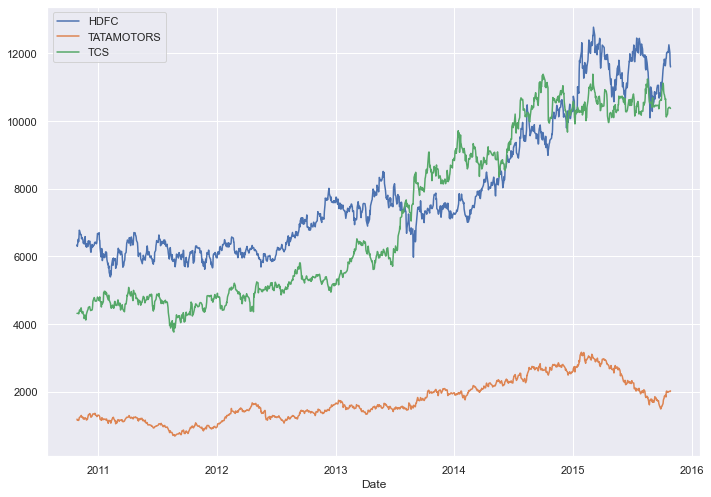

In [13]:
lineplot('Close','28-10-2010','28-10-2015',allCSV,['HDFC','TATAMOTORS','TCS'])

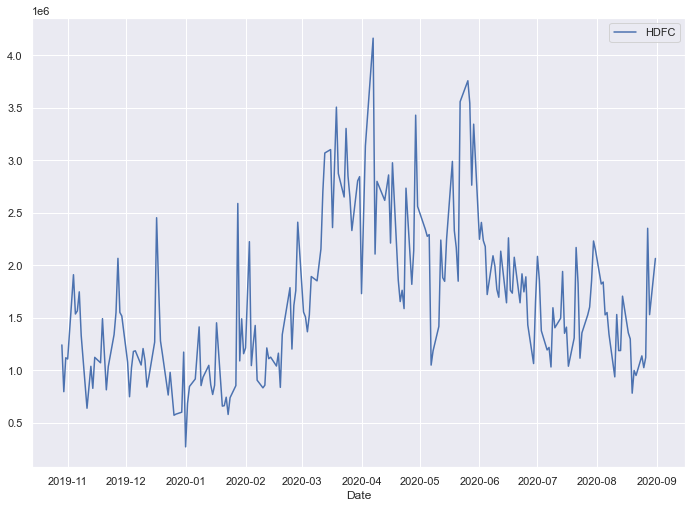

In [14]:
lineplot('Trades','28-10-2019','28-10-2020',allCSV,['HDFC'])

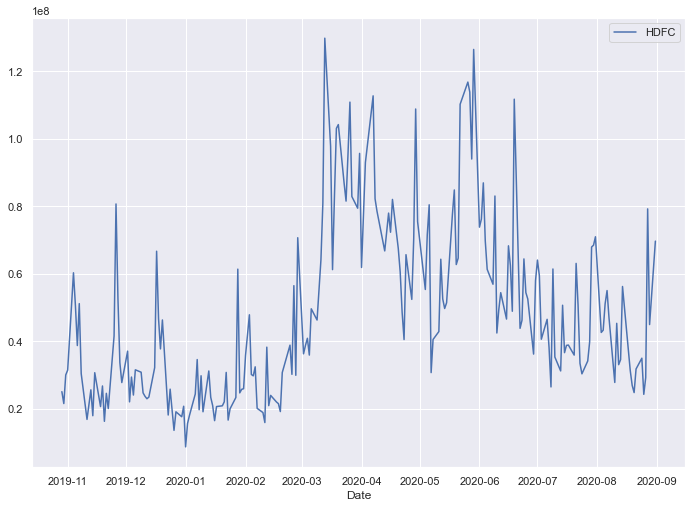

In [15]:
lineplot('Volume','28-10-2019','28-10-2020',allCSV,['HDFC'])


**TODO**
*The next task we must do is to bridge the falls when the shares split*

In [16]:

def rollingMeanPlot(df, start_date, end_date, field):
    rolMean = df[field].rolling(window = 12).mean()
    rolStd = df[field].rolling(window = 12).std()
    rows=df[(df['Date']>=strpdate(start_date)) & (df['Date']<=strpdate(end_date))]
    sns.lineplot(x = rows['Date'],y=rows[field])
    sns.lineplot(x = rows['Date'], y = rolMean)
    plt.legend(labels=['Original Data', 'Rolling Mean'])

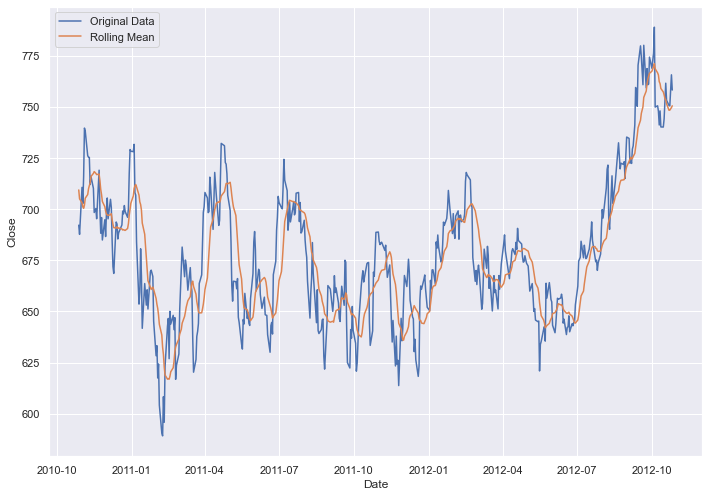

In [17]:
rollingMeanPlot(allCSV['HDFC'], '28-10-2010', '28-10-2012', "Close")

In [18]:
def rollingStdPlot(df, start_date, end_date, field):
    rolStd = df[field].rolling(window = 12).std()
    rows=df[(df['Date']>=strpdate(start_date)) & (df['Date']<=strpdate(end_date))]
    sns.lineplot(x = rows['Date'], y = rolStd)
    plt.legend(labels=['Rolling Standard Deviation'])

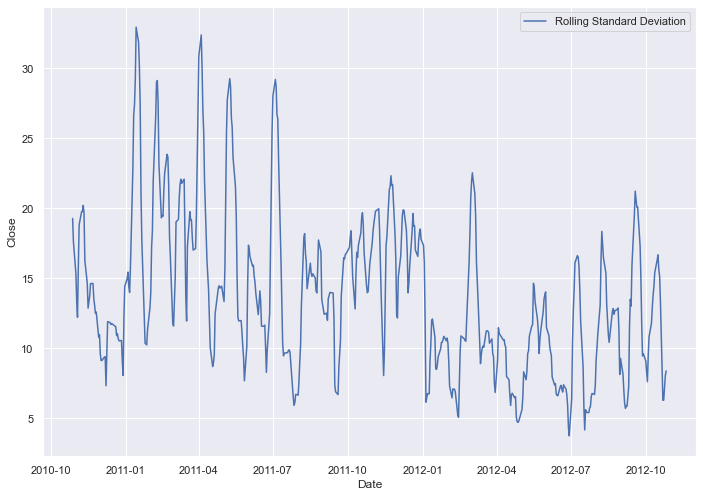

In [19]:
rollingStdPlot(allCSV['HDFC'], '28-10-2010', '28-10-2012', "Close")

In [27]:
def dfInDateRange(df, start_date, end_date):
    rows=df[(df['Date']>=strpdate(start_date)) & (df['Date']<=strpdate(end_date))]
    return rows

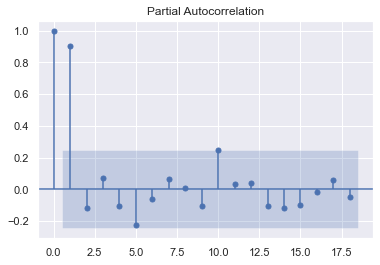

4439    15623.177254
4440    15637.831425
4441    16067.381790
4442    16140.194699
4443    16268.876631
            ...     
4497    17413.275739
4498    17145.379189
4499    17261.238722
4500    17504.406360
4501    17477.845676
Length: 63, dtype: float64


In [68]:
start_date, end_date = '28-10-2017', '28-10-2020'
company = 'HDFC'
companyData = allCSV[company]
dateDf = dfInDateRange(companyData, start_date, end_date)
series = dateDf['Close'] * dateDf['Split Factor']
plot_pacf(series)
plt.show()
print(series)

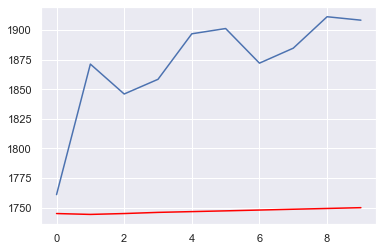

In [73]:
from statsmodels.tsa.arima_model import ARIMA
start_date, end_date = '28-10-2017', '28-1-2018'
company = 'HDFC'
companyData = allCSV[company]
X = dfInDateRange(companyData, start_date, end_date)
X = X["Close"]
size = int(0.85 * len(X))
train, test = X[0:size].reset_index()["Close"], X[size:].reset_index()["Close"]
history = [x for x in train]
predictions = []
# print(train)

for t in range(len(test)):
    model = ARIMA(history, order = (4, 1, 0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
#     print('predicted=%f, expected=%f' % (yhat, obs))
    
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()